                       Model       RMSE        MAE      MSLE        R2
0          Linear Regression  33.230023  18.366167  0.064673  0.878508
1              Decision Tree  30.884650   9.087945  0.034996  0.895052
2      Polynomial Regression  31.112567  18.096346  0.051294  0.893498
3  Support Vector Regression  37.097150  16.403666  0.100915  0.848585


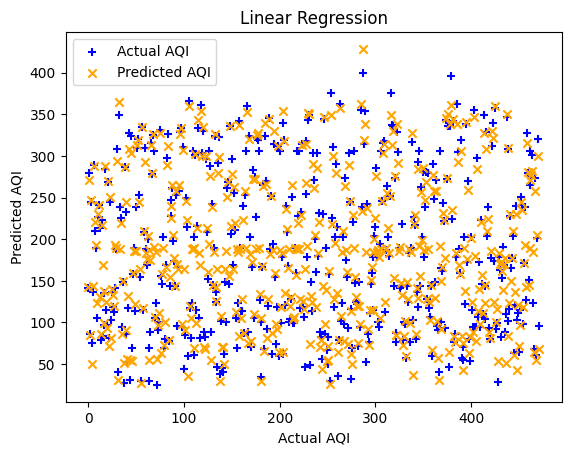

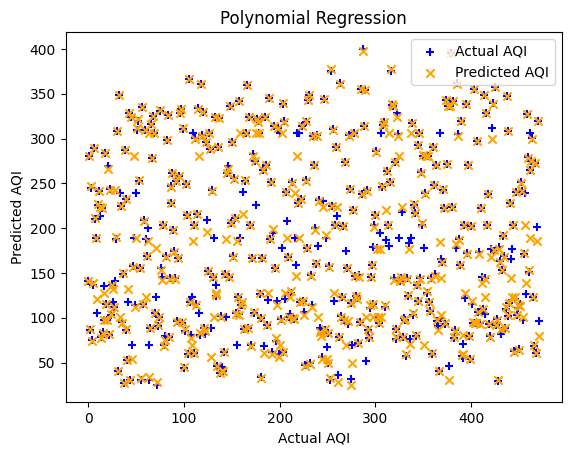

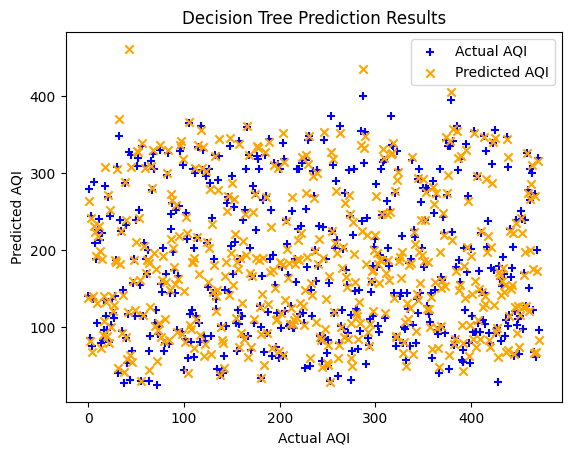

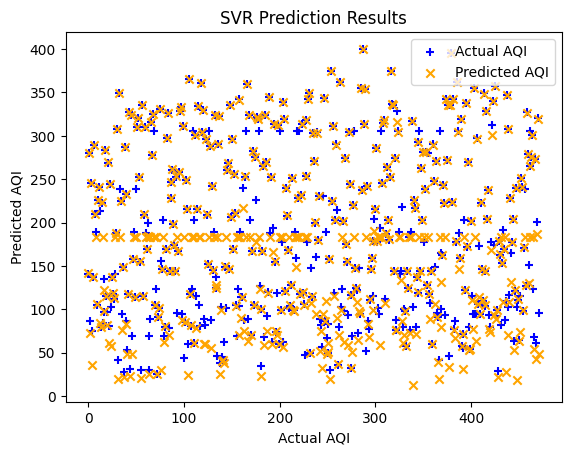

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

# Load the dataset
file_path = '/content/RAW_DATASET_state_weather_aqi_data_filled.csv'
data = pd.read_csv(file_path)

# Ensure only numeric columns are used in X
X = data.select_dtypes(include=[np.number]).drop(['AQI'], axis=1)  # Air pollutant components as features
y = data['AQI']  # AQI values as target

# Fill missing values in X and y with the mean of each column
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split data into training and testing sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define a function to evaluate models and return predictions and metrics
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    msle = mean_squared_log_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return predictions, rmse, mae, msle, r2

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Polynomial Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='linear')
}

# Polynomial Features for Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Store results for each model
results = []
predictions_dict = {}

# Evaluate each model and collect predictions and metrics
for name, model in models.items():
    if name == "Polynomial Regression":
        predictions, rmse, mae, msle, r2 = evaluate_model(model, x_train_poly, y_train, x_test_poly, y_test)
    else:
        predictions, rmse, mae, msle, r2 = evaluate_model(model, x_train, y_train, x_test, y_test)
    predictions_dict[name] = predictions
    results.append([name, rmse, mae, msle, r2])

# Convert results into a DataFrame for better visualization
df_results = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "MSLE", "R2"])

# Display results
print(df_results)

plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(predictions_dict["Linear Regression"])), predictions_dict["Linear Regression"], c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Linear Regression')
plt.legend()
plt.show()
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(predictions_dict["Decision Tree"])), predictions_dict["Decision Tree"], c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(predictions_dict["Polynomial Regression"])),predictions_dict["Polynomial Regression"] , c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(predictions_dict["Support Vector Regression"])),predictions_dict["Support Vector Regression"] , c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('SVR Prediction Results')
plt.legend()
plt.show()